In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists():
  urlretrieve(MNIST_URL, path_gz)

In [ ]:
# urlretrieve??

In [4]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Jun 30 19:17 mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [6]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [7]:
len(lst1)

784

In [8]:
def chunks(x, sz):
  for i in range(0, len(x), sz):
    yield x[i:i+sz]

In [9]:
# def chunks(x, sz):
#   img = []
#   for i in range(0, len(x), sz):
#     img.append(x[i:i+sz])

#   return img

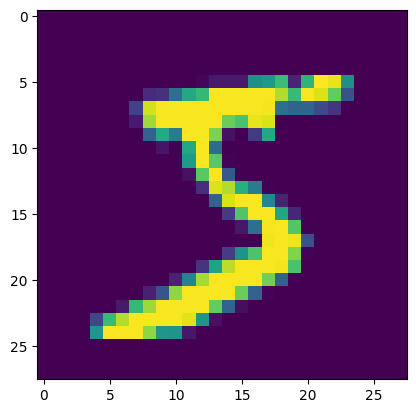

In [11]:
plt.imshow(list(chunks(lst1, 28)))

In [12]:
from itertools import islice

In [16]:
it = iter(vals)
isit = islice(it, 5)
list(isit)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [26]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))


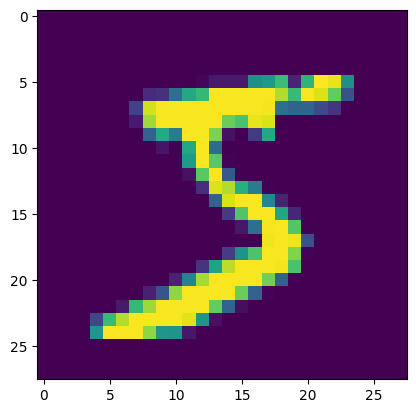

In [27]:
plt.imshow(img)

In [30]:
img[20][15]

0.98828125

In [31]:
class Matrix:
  def __init__(self, xs):
    self.xs = xs

  def __getitem__(self, idxs):
    return  self.xs[idxs[0]][idxs[1]]

In [32]:
m = Matrix(img)
m[20, 15]

0.98828125

In [33]:
import torch
from torch import tensor

In [34]:
tensor([1, 2, 3])


tensor([1, 2, 3])

In [35]:
tens = tensor(img)

In [36]:
tens[20, 15]

tensor(0.9883)

In [38]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

<ipython-input-38-bc003b885c2d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))


torch.Size([50000, 784])

In [40]:
x_train.type()

'torch.FloatTensor'

In [41]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])